C&S10.13 Unsteady-State Mass Transfer in a Slab
Method of Lines Solution

##### C&S10.13
A slab of material with a thickness of 0.004 m has one surface suddenly exposed to a solution containing component A with $C_{A0} = 6\times 10^{-3} kmol/m^3_{liq}$ while the other surface is supported by an insulated solid preventing any mass transport out of the slab.  

Determine the concentration profile of A in the slab as a function of time and distance $x$. 

You will solve this problem using ODE solvers which can only solve first order ODE’s.  We will transform the unsteady state mole balance into a differential equation in time and an approximation of the second derivative term using finite differences.  Then we will use the method of lines to solve the unsteady-state concentration on each line.  

Using a control volume within the slab of $\Delta V=A_c\Delta x$ gives
Differential mole Balance in x direction
	$$\Delta V \frac{\partial C_A}{\partial t}=N_AA_c|_x-N_AA_c|_{x+∆x}  	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(1)$$	 	
Dividing by the control volume and taking the limit
	$$\lim_{\Delta V \to 0} \frac{\partial C_A}{\partial t}=\frac{N_AA_c|_x-N_AA_c|_{x+\Delta x}}{\Delta V }	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(2)$$

Changing the numerator to always have the $\Delta x$ term first and then taking the limit to remove the $\Delta 's$ and obtain a partial derivative:
	$$\frac{\partial C_A}{\partial t}=\lim_{\Delta V \to 0}\left[-\frac {N_AA_c|_{x+∆x}-N_AA_c|_x}{\pi r^2 (x+\Delta x - x)}\right]  =-\frac{\partial N_A A_c}{ \pi r^2 \partial x}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(3)$$
This should remind you of your calculus in which these limits are how derivatives are defined.  Since in this slab the area is a constant and it can be removed from the derivative.
	$$\frac{\partial C_A}{\partial t}=-\frac{\partial\left(N_A\right)}{\partial x}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(4)$$


The constitutive equation for mass transfer is that the flux of moles is equal to a diffusive flux and a convective flux.  For this problem we will assume that the concentration of A in the slab is very dilute and no convection occurs.  The following equation results:    
	$$N_A=J_A	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(5)$$

The diffusive flux of A has been found to be from experiments
	$$J_A=-\mathcal{D}\frac{dC_A}{dx}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(6)$$
Substituting this ODE into the mole balance gives
$$ \frac{\partial C_A}{\partial t}=\mathcal{D}\frac {\partial ^2 C_A}{\partial x^2}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(7)$$
	
The boundary conditions for this equation is at the surface of the liquid and solid $x=0$ in which we are assuming equilibrium and at $x=L$ in which we are assuming no molar flux or an insulated boundary.  

The Diffusivity within the slab is $\mathcal{D} = 1\times 10^{-9} m^2/s$.  The equilibrium between the liquid and the slab for component A at the interface $i$ or $x=0$ is given by a distribution coefficient equation 
$$K=\frac {{{C_A}_{liq}}_i} {{C_A}_i} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(8)$$
with $K=1.5 m^3_{solid}/m^3_{liq}$

Using this equilibrium relation the boundary conditions are:   
	$$\left.C_A\right|_{x=0}=\frac {{{C_A}_{liq}}|_{x=0}} {K}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(9)$$

$$ \left.\frac{\partial C_A}{\partial x}\right|_{x=L}=0\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(10)$$

We also need to specify initial conditions for the slab.  We will do this in two steps.  
Part I $C_A=0$ for all $x$ at $t=0$ <br>

<b> Solution </b>
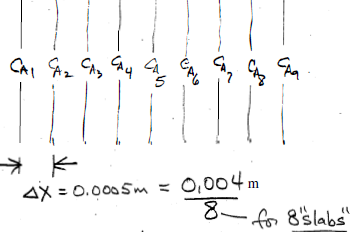
Divide the slab into 8 smaller slabs of width $\Delta x = 0.0005 m$
The surface of the slab at $x=0$ will have a concentration designatated as $C_{A1}$.  The concentration a distance 0.0005 m away will have a concentration of $C_{A2}$ and so on until the final line at the insulated boundary $C_{A9}$.  We will use an unsteady-state differential equation to keep track of the change in concentration as a function of time.
$$ \frac{\partial C_{Ai}}{\partial t}=\mathcal{D}f(C_A)\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(12)$$
For concentrations on lines 2 through 8 we will use Appendix A
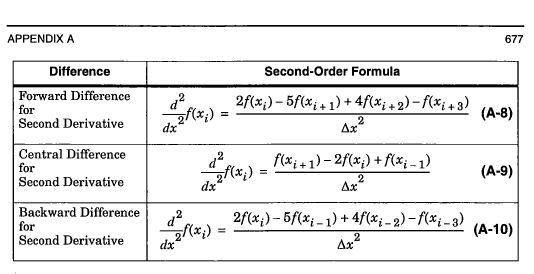
The second derivative is approximated as 
$$\frac {\partial ^2 C_{An}}{\partial x^2}\approx \frac{C_{A(n+1)}-2C_{An}+C_{A(n-1)}}{\Delta x^2}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(13)$$
For the first line $n=1$ 
$$C_{A1}=\frac {{{C_A}_{liq}}|_{x=0}} {K}$$
for the last line $n=9$ we had the insulated boundary condition given by equation 11.  Again we need a finite difference approximation of this derivative. Using the second order formula of the first derivative from the following table: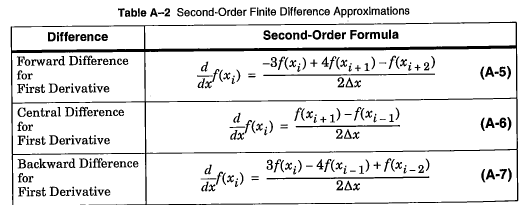
We see that we need a backward difference approximation since we only know the concentrations within the slab
$$\frac{\partial C_{A9}}{\partial x}=\frac { 3C_{A_n}-4C_{A_{n-1}}+C_{A_{n-2}}}{2\Delta x}=\frac { 3C_{A9}-4C_{A8}+C_{A7}}{2\Delta x}=0$$

In [1]:
c=6/1.5
print(c)

4.0


In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt
%matplotlib inline

You need to add the appropriate equations to the cell below to define your time derivatives.  This is why
all of the cells below have errors.  When you add the appropriate equations then you will remove the errors 
when you run the cell.

In [3]:
def  ODEfun(t,Yfuncvec):
    CA2 = Yfuncvec[0] 
    CA3 = Yfuncvec[1] 
    CA4 = Yfuncvec[2] 
    CA5 = Yfuncvec[3] 
    CA6 = Yfuncvec[4] 
    CA7 = Yfuncvec[5] 
    CA8 = Yfuncvec[6] 
    DAB = 0.000000001 
    deltax = 0.0005 
#fill in the equations for CA1 and CA9 ( you need the if for C&S10.13a)
    if (t == 0): 
        CA9 = #fill this in
    else
        CA9 = #fill this in
    
    CA0 = 0.006 #kmol/m^3
    K = 1.5 
    if (t == 0)
        CA1 = CA0 / K
    else:
        CA1 = CA0 / K
   #fill in the differential equations  
    dCA2dt = 
    dCA3dt =
    dCA4dt =
    dCA5dt =  
    dCA6dt = 
    dCA7dt = 
    dCA8dt = 
    dYfuncvecdt = [dCA2dt, dCA3dt, dCA4dt, dCA5dt, dCA6dt, dCA7dt, dCA8dt] 
    return dYfuncvecdt

SyntaxError: invalid syntax (<ipython-input-3-2a436da48afc>, line 13)

In [4]:
#test of function ODEfun 
tspan = [0, 2500.]; # Range for the independent variable 
y0 = [0, 0, 0, 0, 0, 0, 0] # Initial values (@ t=0) for the dependent variables (which are defined in ODEfun lines 2 through 8)

sol=ODEfun(0.00,y0)
print (sol)
print(y0)

NameError: name 'ODEfun' is not defined

In [7]:
tspan = [0, 2500.] # Range for the independent variable 
y0 = [0, 0, 0, 0, 0, 0, 0] # Initial values for the dependent variables
sol=solve_ivp(ODEfun,tspan,y0,atol=1e-7,rtol=1e-7)#solve the ODE 
print(sol.y[0,-1]) #This should print CA2=3.29295413e-03
print(sol)

NameError: name 'ODEfun' is not defined

In [4]:
#printing of the results
totalRow=len(sol.t) # This determines the number of rows of data
CA1=np.zeros(totalRow) #np.zeros initializes the array that we will fill
CA9=np.zeros(totalRow)
print('                     Summary of Results\n')
print('\nSolution ')
print('      t           CA1       CA2        CA3       CA4       CA5       CA6       CA7       CA8       CA9      ')
print('  (s)     All concentrations kmol/$m^3$')

row=0
for row in range(len(sol.t)):
#CA1 is defined in line24, CA2 is the first element of sol.y[0][row] Where the row will correspond with a time   
    CA7=sol.y[5][row] # 
    CA8=sol.y[6][row]
    
    if (row == 0): 
        CA9[row] = 0
    else:
        CA9[row] = (4 * CA8 - CA7) / 3
     
    CA0 = 0.006 
    K = 1.5 
    if (row == 0): 
        CA1[row] = CA0 / K
    else:
        CA1[row] = CA0 / K
    print(' {:10.2e} {:10.3e} {:10.3e} {:10.3e} {:10.3e} {:10.3e} {:10.3e} {:10.3e} {:10.3e} {:10.3e}'.format(sol.t[row],
                            CA1[row],sol.y[0][row],sol.y[1][row],sol.y[2][row],sol.y[3][row],sol.y[4][row],
                                                sol.y[5][row],sol.y[6][row],CA9[row]))

NameError: name 'sol' is not defined

In [5]:
#plot the data
plt.plot(sol.t,CA1,':k',label='CA1')
plt.plot(sol.t,sol.y[0],':b',label='CA2')
plt.plot(sol.t,sol.y[1],':g', label='CA3')
plt.plot(sol.t,sol.y[2],':r', label='CA4')
plt.plot(sol.t,sol.y[3],':c', label='CA5')
plt.plot(sol.t,sol.y[4],':m', label='CA6')
plt.plot(sol.t,sol.y[5],':r', label='CA7')
plt.plot(sol.t,sol.y[6],':c', label='CA8')
plt.plot(sol.t,CA9,':m', label='CA9')
plt.title('Slab Concentration Profile with $C_{Ainitial}=0$')
plt.xlabel('Time (s)')
plt.ylabel('Mole Fraction of A ')
plt.legend()
plt.xlim(0, 3500)
plt.ylim(0, 0.005)

NameError: name 'sol' is not defined